In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# The mechanism of K-means

<b>Idea:</b> Decide a sample belongs to a group if the distance between centroid of that group and sample is nearest 

<b>Loss function:</b> $ L(Y,M) = \sum_{i=1}^N \sum_{j=1}^K y_{ij}{\lVert x_i - m_j\rVert}^2_2 $ <br>
With:
<b>Y</b> = $[y_1;y_2;...;y_n]$ as label of 

<b>Step by step:</b><br>
- Initialize all the center of clusters (K cluster, with K will be defined by user) 
- While the loss function not converged (or not having changes of member in clusters):
  - Assign all sample to their relevant clusters (the cluster will be chosen by the distance of their centroids and and the sample)
  - Recalculate the centroid (in this case, get mean of all samples of that cluster)

In [2]:
#Initilize data

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

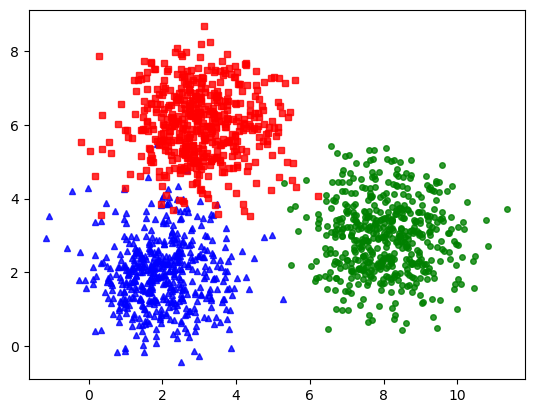

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

[[8.48068604 1.4817359 ]
 [1.11339934 1.74130447]
 [7.7061687  3.05809682]]
[[8.66998964 1.88015547]
 [2.21830335 3.68019011]
 [6.91752649 4.04613048]]
[[8.48477759 2.39367637]
 [2.35892113 3.88629749]
 [6.96980067 4.09534587]]
[[8.37770304 2.54508097]
 [2.38113163 3.90779251]
 [6.80417824 4.27647135]]
[[8.33079172 2.60505507]
 [2.3699292  3.8955726 ]
 [6.60443453 4.46391889]]
[[8.27533096 2.65641917]
 [2.33847772 3.85486473]
 [6.28512298 4.78479718]]
[[8.20973872 2.74643767]
 [2.27656417 3.7517336 ]
 [5.57560119 5.36208792]]
[[8.13096283 2.84724924]
 [2.12592668 3.36400204]
 [4.30732451 6.09509768]]
[[8.05520562 2.94256982]
 [1.99875412 2.47117305]
 [3.27528534 6.23958167]]
[[8.03038618 2.96115613]
 [1.99218229 2.05081113]
 [3.03631438 6.08637204]]
[[8.01933925 2.96432812]
 [1.97173467 1.99251421]
 [3.01855945 6.04068694]]
[[8.01933925 2.96432812]
 [1.97323851 1.98338985]
 [3.01280778 6.03356564]]
Centers found by our algorithm:
[[8.01933925 2.96432812]
 [1.97323851 1.98338985]
 [3.01

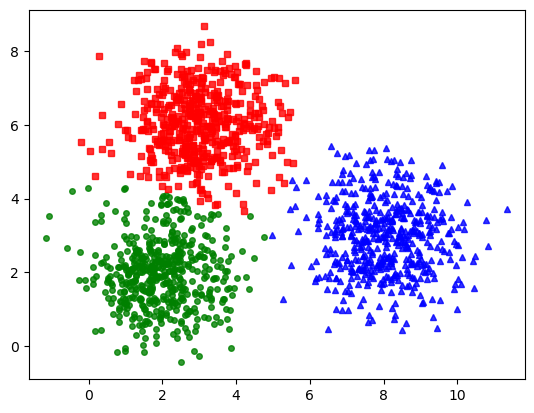

In [4]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    #The metric dist(u=XA[i], v=XB[j]) is computed and stored in the ij-th entry
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))


def kmeans(X, K):
    centers = kmeans_init_centers(X, K)
    labels = []
    it = 0 
    while True:
        labels = kmeans_assign_labels(X, centers)
        new_centers = kmeans_update_centers(X, labels, K)
        print(centers)
        if has_converged(centers, new_centers):
            break
        centers = new_centers
        it += 1
    return (centers, labels, it)


(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers)

kmeans_display(X, labels)

# Run by SKLearn

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=3,random_state=0).fit(X)
model.cluster_centers_

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([[1.96845605, 1.98030557],
       [8.01933925, 2.96432812],
       [3.01553291, 6.02850912]])